<a href="https://colab.research.google.com/github/raissadhrmswr/Final-DataSci/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("https://gitlab.maastrichtuniversity.nl/Niels.Hameleers/dtz2025-datasets/-/raw/master/diabetes.csv")

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Data Exploration

In [ ]:
df.shape

(768, 9)

I use df.shape() to get insight how many rows and columns in the dataset. There are 9 rows and 768 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


I use df.info() to get insight whether there is any rows that has NaN as a value. From code that has been written above, it can be said that each rows have its value.

**Check whether BMI & Glucose is not equal to 0**


In [ ]:
print(0 in df["BMI"].values)
print(0 in df["Glucose"].values)

True
True


From code that stated above, I check whether BMI & Glocose have value of 0. It returs True as outputs. It can be concluded that there are several rows that in BMI & Glucose that has value of 0, which should later be remove.

**Check whether blood pressure < 40**

In [ ]:
print(df["BloodPressure"].values < 40)

[False False False False False False False  True False False False False
 False False False  True False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False  True False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

The code to check blood pressure is the same as BMI & Glucose checking. The output shows True which means thatthere are several rows that in blood pressure that has value of 40, which should later be remove.

**Distribution plot on variable glucose**

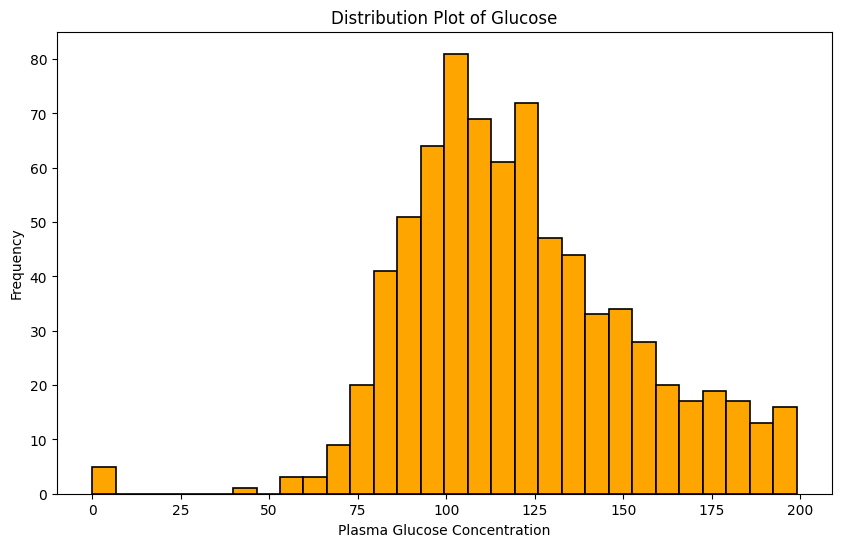

In [ ]:
glucose = df["Glucose"]
plt.figure(figsize=(10, 6))
plt.hist(glucose, bins=30, color='orange', edgecolor='black', linewidth=1.2)
plt.xlabel('Plasma Glucose Concentration')
plt.ylabel('Frequency')
plt.title('Distribution Plot of Glucose')
plt.show()

**Identify how many individuals are in different classes**

In [ ]:
df.groupby("Outcome")["Outcome"].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

Using .groupby() and .count() to create group and sum it based on selected variable, which is "Outcome". It shows that 500 individual belongs to Class 0 and 268 individual belongs to Class 1.

**Summary of Statistics**

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


I use .describe() to summarize of descriptive statistics from this dataset.

# Data Cleaning

**Searching outlier in every variable**

In this part, I use boxplot and interquartile score (IQR score) to spotting outlier. Boxplot can describe distribution of data and the outlier can be describe as a circle that place outside the line of boxplot. IQR score is a statistical measurement that mostly used to spot outlier. Since the image of boxplot cannot determine precisely the value of outlier, I use IQR to finally determine which data can be cathegorize as outlier.

In [ ]:
def boxplot(data, ylabel, variable):
  plt.figure(figsize=(10, 6))
  plt.boxplot(data)
  plt.ylabel(ylabel)
  plt.title(variable)
  plt.show()

In [ ]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = (q3-q1)
upper_bound = (q3 + 1.5 * iqr).tolist()
lower_bound = (q1 - 1.5 * iqr).tolist()

In [ ]:
for i in range(len(lower_bound)):
    if lower_bound[i] < 0:
      lower_bound[i] = 0

In [ ]:
inter_quartile_range = {"Variable": ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"],
                        "Lower Bound": lower_bound,
                        "Upper Bound": upper_bound}
iqr_df = pd.DataFrame(inter_quartile_range)
iqr_df

,Variable,Lower Bound,Upper Bound
0,Pregnancies,0.000,13.500
1,Glucose,37.125,202.125
2,BloodPressure,35.000,107.000
3,SkinThickness,0.000,80.000
4,Insulin,0.000,318.125
5,BMI,13.350,50.550
6,DiabetesPedigreeFunction,0.000,1.200
7,Age,0.000,66.500
8,Outcome,0.000,2.500


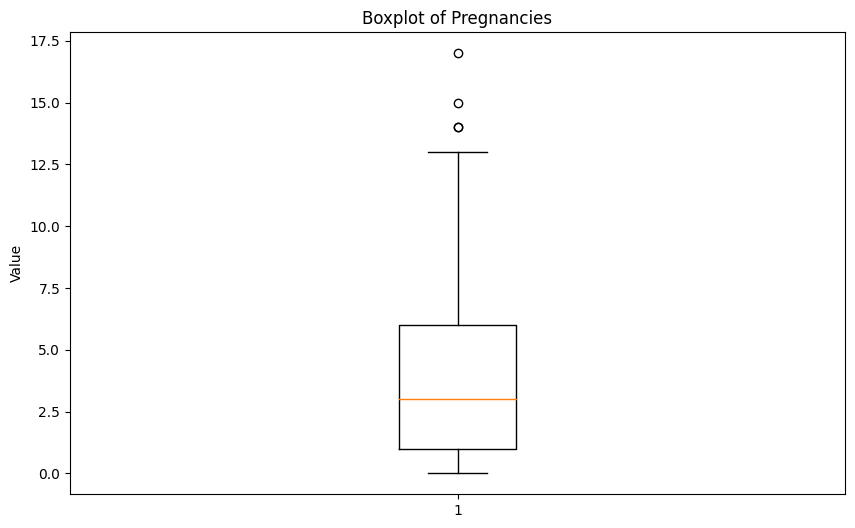

In [ ]:
pregnant = df["Pregnancies"]
boxplot(pregnant, "Value", "Boxplot of Pregnancies")

In this example, I want to know about outlier of pregnancies data. From boxplot, it can be only concluded that if the value of pregnancies data is more that 12.5, then it can be categorized as outlier. With IQR table, it is stated that the upper bound of pregnancies data is equal to 13.5. If there is a pregnancies data > 13.5, it can be called outlier and should be remove on next step.

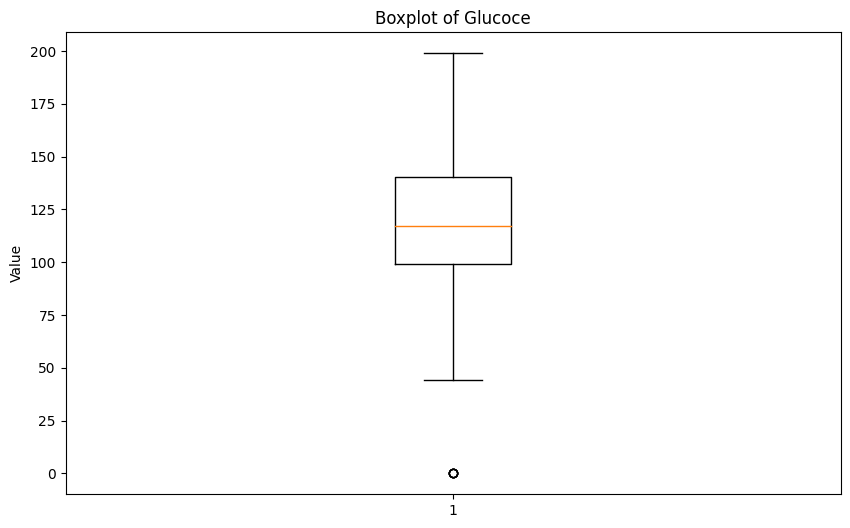

In [ ]:
glucose = df["Glucose"]
boxplot(glucose, "Value", "Boxplot of Glucoce")

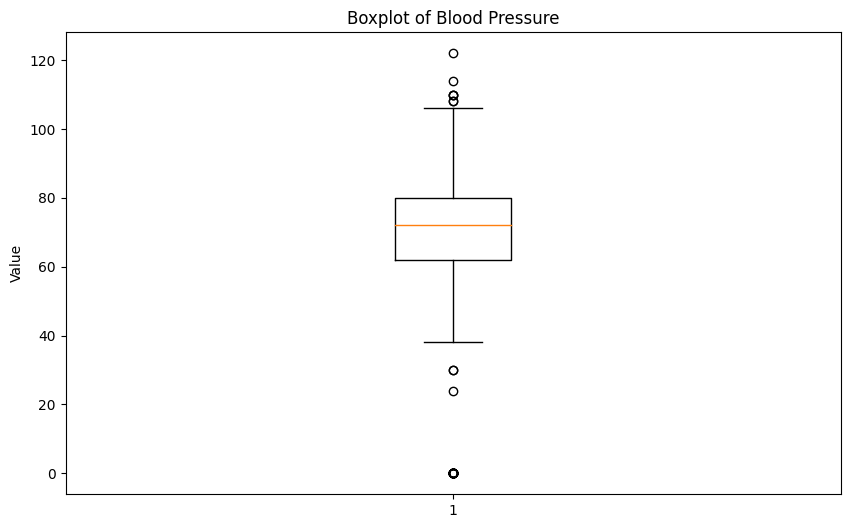

In [ ]:
blood_pressure = df["BloodPressure"]
boxplot(blood_pressure, "Value", "Boxplot of Blood Pressure")

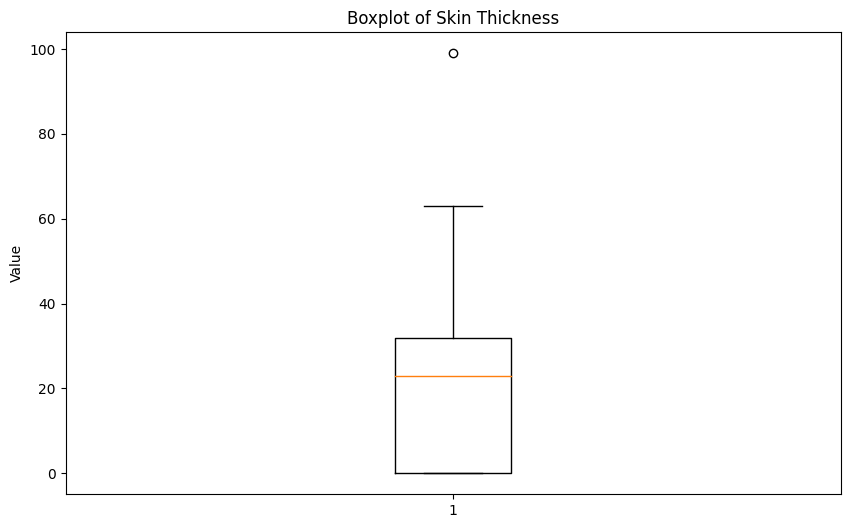

In [ ]:
skin_thickness = df["SkinThickness"]
boxplot(skin_thickness, "Value", "Boxplot of Skin Thickness")

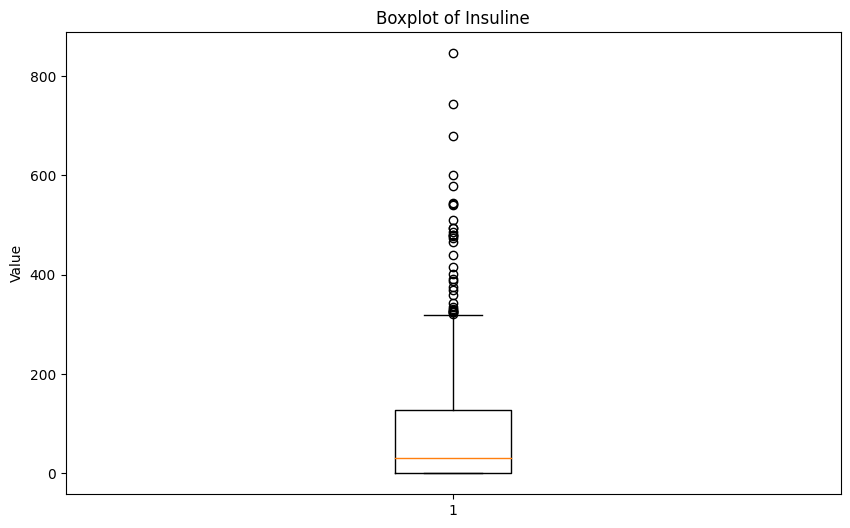

In [ ]:
insulin = df["Insulin"]
boxplot(insulin, "Value", "Boxplot of Insuline")

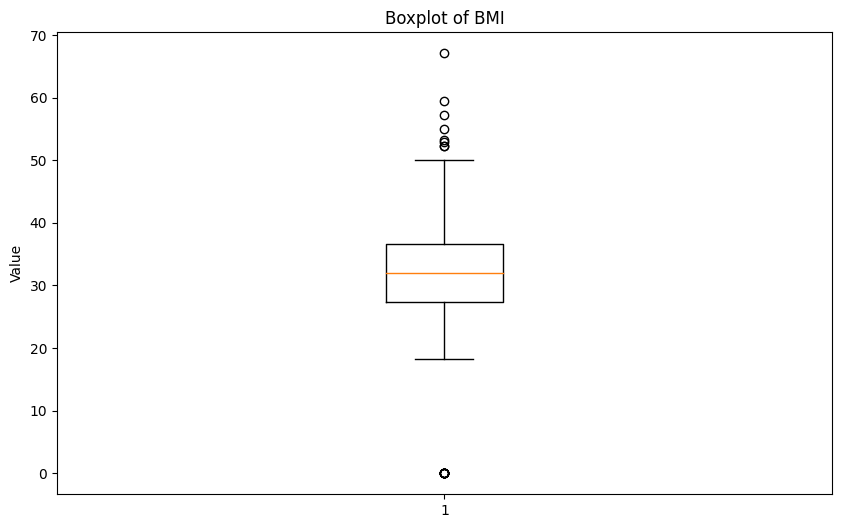

In [ ]:
bmi = df["BMI"]
boxplot(bmi, "Value", "Boxplot of BMI")

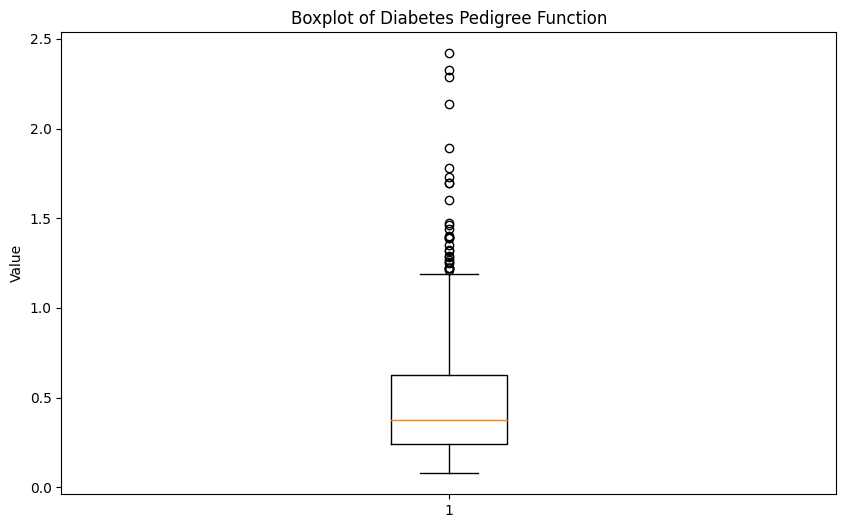

In [ ]:
dpf = df["DiabetesPedigreeFunction"]
boxplot(dpf, "Value", "Boxplot of Diabetes Pedigree Function")

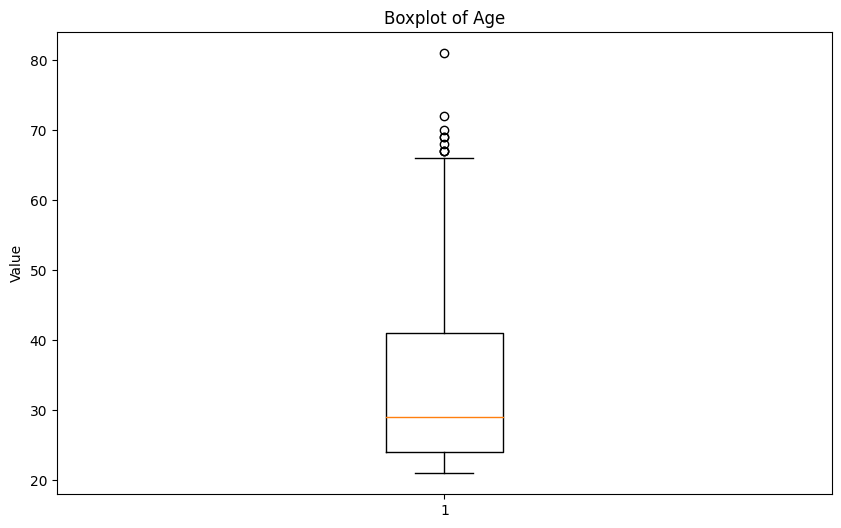

In [ ]:
age = df["Age"]
boxplot(age, "Value", "Boxplot of Age")

**Remove Outlier Data**


From IQR Table, outlier can be said if value of a data is bigger than upper bound or smaller than lower bound. It has addition conditional for BMI & Glucose that these variable should not have 0 as their value and blood pressure should not below than 40.

In [ ]:
outlier_pregnant = []
for i in range(len(pregnant)):
  if pregnant[i] < lower_bound[0] or pregnant[i] > upper_bound[0]:
    outlier_pregnant.append(i)
for i in range(len(outlier_pregnant)):
  df.drop(outlier_pregnant[i], inplace=True)

In [ ]:
outlier_glucose = []
for i in range(len(glucose)):
  if glucose[i] < lower_bound[1] or glucose[i] > upper_bound[1]:
    outlier_glucose.append(i)
for i in range(len(outlier_glucose)):
  df.drop(outlier_glucose[i], inplace=True)

In [ ]:
outlier_blood_pressure = []
for i in range(len(blood_pressure)):
  if blood_pressure[i] < 40 or blood_pressure[i] > upper_bound[2]:
    outlier_blood_pressure.append(i)
for i in range(len(outlier_blood_pressure)):
  df.drop(outlier_blood_pressure[i], inplace=True)

In [ ]:
outlier_skin_thickness = []
for i in range(len(skin_thickness)):
  if skin_thickness[i] < lower_bound[3] or skin_thickness[i] > upper_bound[3]:
    outlier_skin_thickness.append(i)
for i in range(len(outlier_skin_thickness)):
  df.drop(outlier_skin_thickness[i], inplace=True)

In [ ]:
outlier_insulin = []
for i in range(len(insulin)):
  if insulin[i] < lower_bound[4] or insulin[i] > upper_bound[4]:
    outlier_insulin.append(i)
for i in range(len(outlier_insulin)):
  df.drop(outlier_insulin[i], inplace=True)

In [ ]:
outlier_bmi = []
for i in range(len(bmi)):
  if bmi[i] < lower_bound[5] or bmi[i] > upper_bound[5]:
    outlier_bmi.append(i)
for i in range(len(outlier_bmi)):
  df.drop(outlier_bmi[i], inplace=True)

KeyError: ignored

In [ ]:
outlier_dpf = []
for i in range(len(dpf)):
  if dpf[i] < lower_bound[6] or dpf[i] > upper_bound[6]:
    outlier_dpf.append(i)
for i in range(len(outlier_dpf)):
  df.drop(outlier_dpf[i], inplace=True)

KeyError: ignored

In [ ]:
outlier_age = []
for i in range(len(age)):
  if age[i] < lower_bound[7] or age[i] > upper_bound[7]:
    outlier_age.append(i)
for i in range(len(outlier_age)):
  df.drop(outlier_bmi[i], inplace=True)

KeyError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               668 non-null    int64  
 1   Glucose                   668 non-null    int64  
 2   BloodPressure             668 non-null    int64  
 3   SkinThickness             668 non-null    int64  
 4   Insulin                   668 non-null    int64  
 5   BMI                       668 non-null    float64
 6   DiabetesPedigreeFunction  668 non-null    float64
 7   Age                       668 non-null    int64  
 8   Outcome                   668 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 68.4 KB


In [ ]:
df_clean = df
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


# Data Analysis - Logistic Regression

**Split Dataset**

In [ ]:
X = df_clean.iloc[:,0:8]
y = df_clean.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)
print("train_X: ", train_X.shape)
print("train_y: ", train_y.shape)
print("test_X: ", test_X.shape)
print("test_y: ", test_y.shape)

train_X:  (534, 8)
train_y:  (534,)
test_X:  (134, 8)
test_y:  (134,)


**Select an Algorithm**

Test with 3 Algorithm (Decision Tree, Random Forest, Logistic Regression)

1. Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(train_X, train_y)

In [ ]:
prediction = clf.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        91
           1       0.51      0.53      0.52        43

    accuracy                           0.69       134
   macro avg       0.64      0.65      0.64       134
weighted avg       0.69      0.69      0.69       134



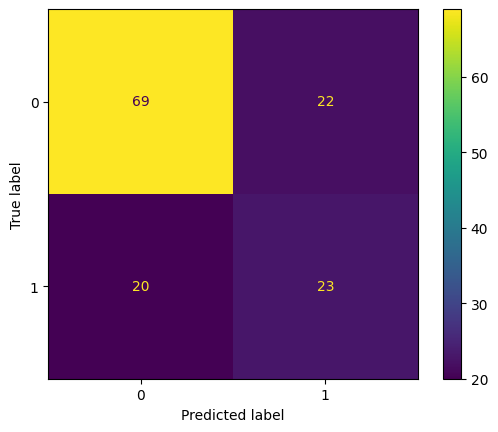

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_X, test_y);

2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(train_X, train_y)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
prediction = clf.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        91
           1       0.55      0.28      0.37        43

    accuracy                           0.69       134
   macro avg       0.63      0.58      0.58       134
weighted avg       0.67      0.69      0.66       134



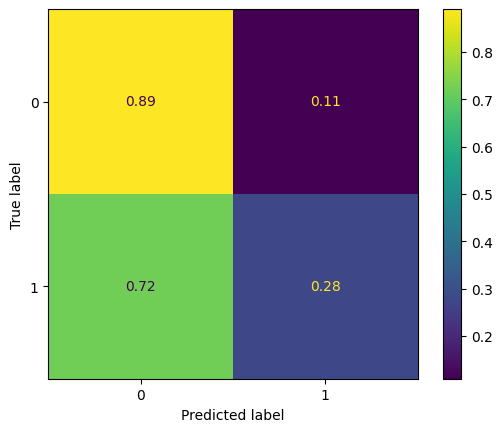

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, test_X, test_y, normalize='true');

3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
clf = LogisticRegression()
clf = clf.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
prediction = clf.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

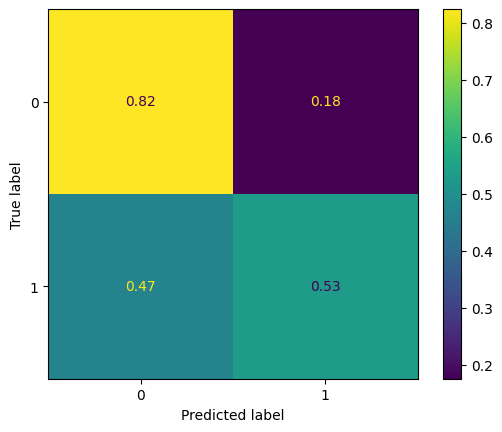

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, test_X, test_y, normalize='true');

**Increasing Model Accuracy on Logistic Regression: Hyperparameter Tuning**

In [ ]:
from sklearn.metrics import log_loss
C_List = np.geomspace(1e-5, 1e5, num=20)
CA = []
Logarithmic_Loss = []

for c in C_List:
  clf2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
  clf2.fit(train_X, train_y)
  score = clf2.score(test_X, test_y)
  CA.append(score)
  pred_proba_t = clf2.predict_proba(test_X)
  log_loss2 = log_loss(test_y, pred_proba_t)
  Logarithmic_Loss.append(log_loss2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
CA2 = np.array(CA).reshape(20,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(20,)
outcomes = zip(C_List, CA2, Logarithmic_Loss2)
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])
df_outcomes
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,14,233.572147,0.753731,0.503085
1,15,784.759970,0.738806,0.507552
2,10,1.832981,0.746269,0.508365
3,18,29763.514416,0.746269,0.508943
4,12,20.691381,0.746269,0.508960
5,13,69.519280,0.746269,0.509654
6,17,8858.667904,0.731343,0.510243
7,16,2636.650899,0.731343,0.512978
8,19,100000.000000,0.746269,0.513042
9,9,0.545559,0.738806,0.515647


In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, random_state=0, shuffle=True)

# Logistic Reg CV
clf3 = LogisticRegressionCV(random_state=42, Cs = C_List, solver ='lbfgs')
clf3.fit(train_X, train_y)
print("The CA is:", clf3.score(test_X, test_y))
pred_proba_t = clf3.predict_proba(test_X)
log_loss3 = log_loss(test_y, pred_proba_t)
print("The Logistic Loss is: ", log_loss3)

print("The optimal C parameter is: ", clf3.C_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

The CA is: 0.7164179104477612
The Logistic Loss is:  0.5231639120977035
The optimal C parameter is:  [0.54555948]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf = LogisticRegression(random_state=42, solver = 'lbfgs', C=233.572147)
clf.fit(train_X, train_y)
score = clf.score(test_X, test_y)

pred_proba_t = clf.predict_proba(test_X)
log_loss2 = log_loss(test_y, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", log_loss2)

Testing Acc: 0.753731343283582
Log Loss: 0.5030852693730321


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**change hyperparameter**

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
clf = LogisticRegression(random_state=42, solver = 'lbfgs', C=233.572147)
clf = clf.fit(train_X, train_y)
prediction = clf.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(y_true=test_y, y_pred=prediction))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        91
           1       0.62      0.58      0.60        43

    accuracy                           0.75       134
   macro avg       0.72      0.71      0.71       134
weighted avg       0.75      0.75      0.75       134



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


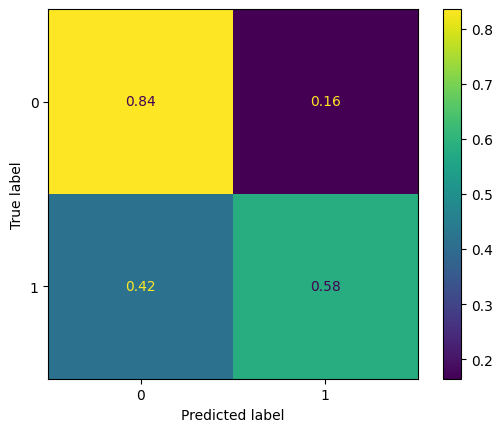

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, test_X, test_y, normalize='true');

# Data Analysis - Neutral Network

In [ ]:
def condition_value(x):
  if x < 18.5:
    return "Underweight"
  elif x >= 18.5 and x < 25.0:
      return "Normal"
  elif x >= 25.0 and x < 30.0:
    return "Overweight"
  elif x >= 30.0 and x < 35.0:
    return "Obesity"
  else:
    return 'Extreme Obesity'

In [ ]:
df_clean["BMI_cat"] = df["BMI"].apply(condition_value)
df_nn = df_clean

In [ ]:
df_nn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6,148,72,35,0,33.6,0.627,50,1,Obesity
1,1,85,66,29,0,26.6,0.351,31,0,Overweight
2,8,183,64,0,0,23.3,0.672,32,1,Normal
3,1,89,66,23,94,28.1,0.167,21,0,Overweight
5,5,116,74,0,0,25.6,0.201,30,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Obesity
764,2,122,70,27,0,36.8,0.340,27,0,Extreme Obesity
765,5,121,72,23,112,26.2,0.245,30,0,Overweight
766,1,126,60,0,0,30.1,0.349,47,1,Obesity


In [ ]:
!pip install torch torchvision -U
import torch
torch.cuda.is_available()

True

In [ ]:
!nvidia-smi

Wed Jun 28 20:40:03 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 88.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.9 MB/s eta 0:00:00


In [ ]:
path = untar_data("https://s3.gijs.me/summerschool/diabetes.zip")
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)

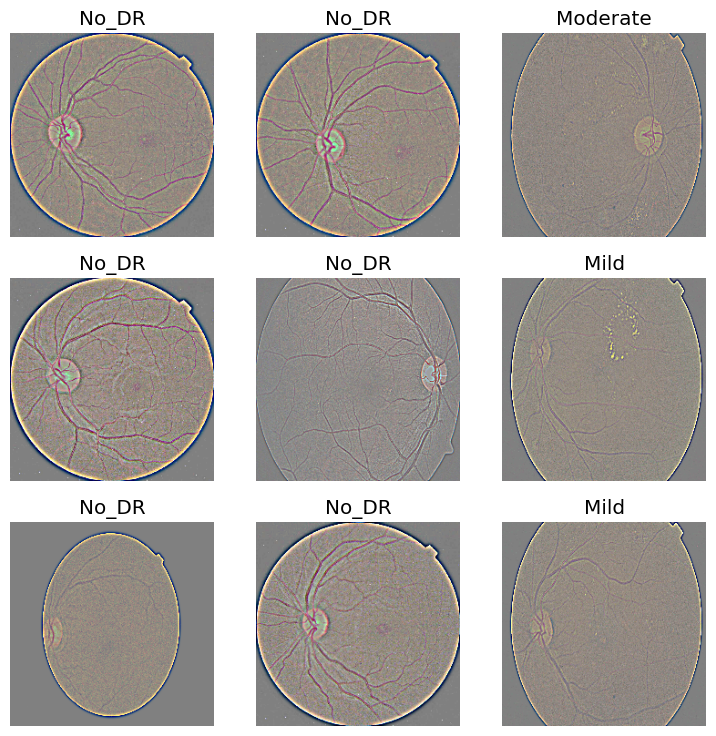

In [ ]:
dls.train.show_batch()

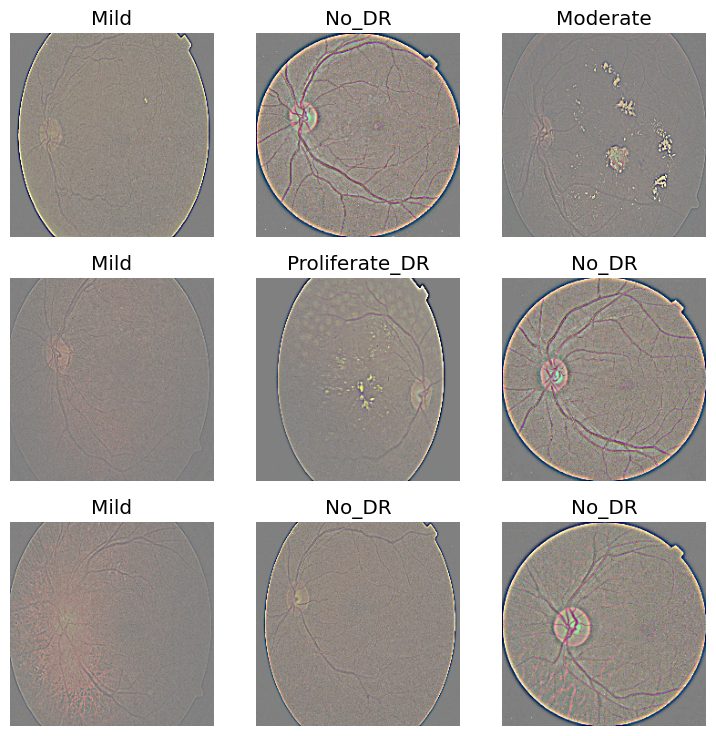

In [ ]:
dls.valid.show_batch()

In [ ]:
learn = vision_learner(dls, alexnet, metrics=[accuracy])
learn.fit(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 168MB/s]


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn_vgg = vision_learner(dls, vgg16_bn, metrics=[accuracy])
learn_vgg.fit(1)

In [ ]:
learn_squeezenet = vision_learner(dls, squeezenet1_0, metrics=[accuracy])
learn_squeezenet.fit(1)

In [ ]:
learn_resnet = vision_learner(dls, resnet18, metrics=[accuracy])
learn_resnet.fit(1)

In [ ]:
learn_xrestnet = vision_learner(dls, xresnet18, metrics=[accuracy])
learn_xrestnet.fit(1)

Use squeezenet1_0

In [ ]:
learn_squeezenet.model

In [ ]:
dls.train.one_batch()[0].shape

In [ ]:
learn_squeezenet.model[0][0][1]

In [ ]:
random_number = torch.rand(64, 27, 27).cuda()
output_squeezenet = learn_squeezenet.model[0][0][1](random_number)
output_squeezenet.shape

In [ ]:
output_squeezenet

In [ ]:
interpretation=ClassificationInterpretation.from_learner(learn_squeezenet)
interpretation.plot_top_losses(9)

In [ ]:
interpretation.plot_confusion_matrix()

In [ ]:
interpretation.print_classification_report()

# Explainable AI

In [ ]:
!pip install -q shap
import shap

In [ ]:
data, values = dls.train.one_batch()

explainer = shap.GradientExplainer(learn_squeezenet.model.cuda(), data[:60])
shap_values,indexes = explainer.shap_values(data[60:], ranked_outputs=2)
decoded_data = dls.train.decode((data, values))[0].permute(0,2,3,1).numpy()
shap_values = [np.transpose(s, (0,2,3,1)) for s in shap_values]
shap.image_plot(shap_values, decoded_data[60:], index_names)